## Pandas Data Selection

There are multiple ways to select and index rows and columns from Pandas DataFrames. I find tutorials online focusing on advanced selections of row and column choices a little complex for my requirements, but mastering the Pandas iloc, loc, and ix selectors can actually be made quite simple.

### Selection Options

There’s three main options to achieve the selection and indexing activities in Pandas, which can be confusing. The three selection cases and methods covered in this post are:

1. Selecting data by row numbers (.iloc)
2. Selecting data by label or by a conditional statement (.loc)
3. Selecting in a hybrid approach (.ix) (now Deprecated in Pandas 0.20.1)

### Data Setup

- Each row in your data frame represents a data sample.
- Each column is a variable, and is usually named. I rarely select columns without their names.
- I need to quickly and often select relevant rows from the data frame for modelling and visualisation activities.

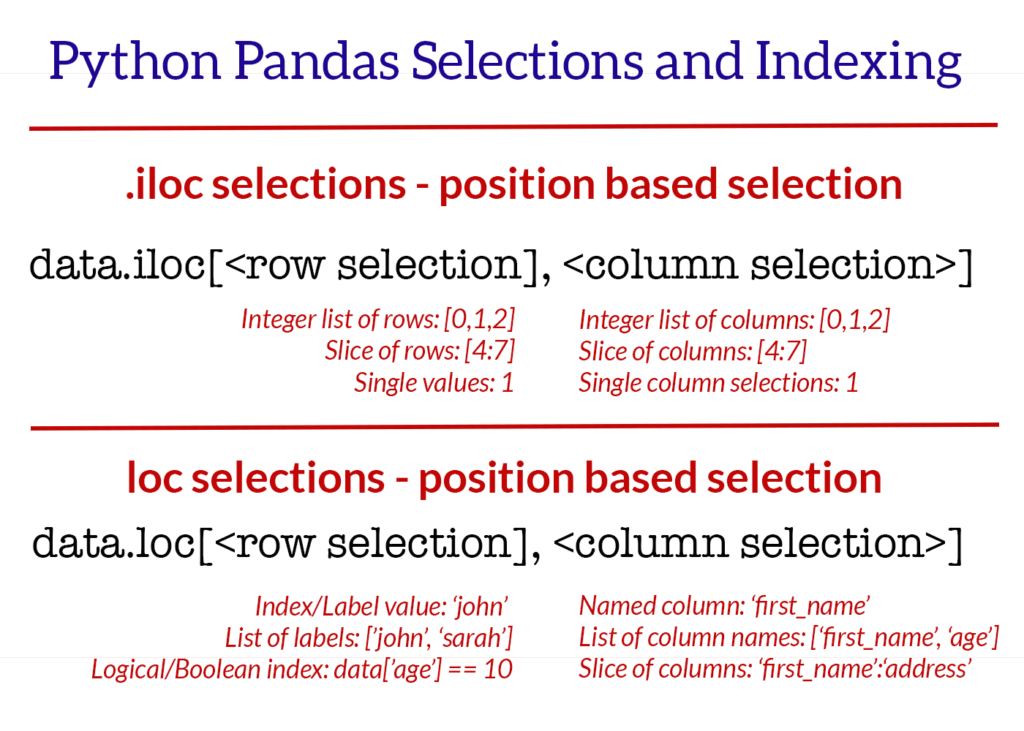

## 1. Pandas iloc data selection

The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.

#### Syntax:

    data.iloc[<row selection>, <column selection>]
    
“iloc” in pandas is used to select rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows (data.shape[0])  and iloc[] allows selections based on these numbers. The same applies for columns (ranging from 0 to data.shape[1] )

There are two “arguments” to iloc – a row selector, and a column selector.  For example:

In [1]:
import pandas as pd
import random
 
# read the data from the downloaded CSV file.
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
data['id'] = [random.randint(0,1000) for x in range(data.shape[0])]
 
data[:2]

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,291
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,724


In [8]:
# Single selections using iloc and DataFrame
# Rows:
# first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
print(data.iloc[0])
print("---------------------------------------------------")

# second row of data frame (Evan Zigomalas)
print(data.iloc[1])
print("---------------------------------------------------")

# last row of data frame (Mi Richan)
print(data.iloc[-1])
print("---------------------------------------------------")

# Columns:
# first column of data frame (first_name)
print(data.iloc[:,0])
print("---------------------------------------------------")

# second column of data frame (last_name)
print(data.iloc[:,1])
print("---------------------------------------------------")

# last column of data frame (id)
print(data.iloc[:,-1])
print("---------------------------------------------------")


first_name                                   Aleshia
last_name                                 Tomkiewicz
company_name                 Alan D Rosenburg Cpa Pc
address                                 14 Taylor St
city                               St. Stephens Ward
county                                          Kent
postal                                       CT2 7PP
phone1                                  01835-703597
phone2                                  01944-369967
email                        atomkiewicz@hotmail.com
web             http://www.alandrosenburgcpapc.co.uk
id                                               291
Name: 0, dtype: object
---------------------------------------------------
first_name                                   Evan
last_name                               Zigomalas
company_name                   Cap Gemini America
address                               5 Binney St
city                                   Abbey Ward
county                            Bucki

**Multiple columns and rows can be selected together using the .iloc indexer.**

In [17]:
# Multiple row and column selections using iloc and DataFrame
# first five rows of dataframe
print(data.iloc[0:5])
print("********************************************************************")

# first two columns of data frame with all rows
print(data.iloc[:,:2])
print("********************************************************************")

# 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
print(data.iloc[[0,3,6,24],[0,5,6]])
print("********************************************************************")

# first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).
print(data.iloc[:5,[4,5,6]])
# print(data.iloc[:5,4:7])

  first_name   last_name             company_name            address  \
0    Aleshia  Tomkiewicz  Alan D Rosenburg Cpa Pc       14 Taylor St   
1       Evan   Zigomalas       Cap Gemini America        5 Binney St   
2     France     Andrade      Elliott, John W Esq       8 Moor Place   
3    Ulysses   Mcwalters           Mcmahan, Ben L      505 Exeter Rd   
4     Tyisha      Veness           Champagne Room  5396 Forth Street   

                             city           county    postal        phone1  \
0               St. Stephens Ward             Kent   CT2 7PP  01835-703597   
1                      Abbey Ward  Buckinghamshire  HP11 2AX  01937-864715   
2  East Southbourne and Tuckton W      Bournemouth   BH6 3BE  01347-368222   
3              Hawerby cum Beesby     Lincolnshire  DN36 5RP  01912-771311   
4      Greets Green and Lyng Ward    West Midlands   B70 9DT  01547-429341   

         phone2                       email  \
0  01944-369967     atomkiewicz@hotmail.com   
1  0

**There’s two gotchas to remember when using iloc in this manner:**

***Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.***

In [22]:
data.iloc[[2]]

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798


In [23]:
data.iloc[:3]

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,291
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,724
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798


In [26]:
print(data.iloc[:,[0]])

    first_name
0      Aleshia
1         Evan
2       France
3      Ulysses
4       Tyisha
..         ...
495      Avery
496       Reid
497  Charlette
498  Celestina
499         Mi

[500 rows x 1 columns]


## 2. Pandas loc data selection

The Pandas loc indexer can be used with DataFrames for two different use cases:

a. Selecting rows by label/index
b. Selecting rows with a boolean / conditional lookup

**The loc indexer is used with the same syntax as iloc:**

    data.loc[<row selection>, <column selection>]

### 2a. Label-based / Index-based indexing using .loc

Selections using the loc method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <code>df.set_index()</code>, the .loc method directly selects based on index values of any rows. For example, setting the index of our test data frame to the persons “last_name”:

In [32]:
data1 = data.set_index("first_name")
data1[:15]

,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
first_name,,,,,,,,,,,
Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,291
Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,724
France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798
Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,47
Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,765
Eric,Rampy,"Thompson, Michael C Esq",9472 Lind St,Desborough,Northamptonshire,NN14 2GH,01969-886290,01545-817375,erampy@rampy.co.uk,http://www.thompsonmichaelcesq.co.uk,350
Marg,Grasmick,Wrangle Hill Auto Auct & Slvg,7457 Cowl St #70,Bargate Ward,Southampton,SO14 3TY,01865-582516,01362-620532,marg@hotmail.com,http://www.wranglehillautoauctslvg.co.uk,250
Laquita,Hisaw,In Communications Inc,20 Gloucester Pl #96,Chirton Ward,Tyne & Wear,NE29 7AD,01746-394243,01590-982428,laquita@yahoo.com,http://www.incommunicationsinc.co.uk,289
Lura,Manzella,Bizerba Usa Inc,929 Augustine St,Staple Hill Ward,South Gloucestershire,BS16 4LL,01907-538509,01340-713951,lura@hotmail.com,http://www.bizerbausainc.co.uk,157


**Now with the index set, we can directly select rows for different “last_name” values using .loc[<label>]  – either singly, or in multiples.**
    
#### For example:

In [30]:
data1.loc[['France']]

,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
first_name,,,,,,,,,,,
France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798


In [31]:
data1.loc[['France','Tyisha']]

,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
first_name,,,,,,,,,,,
France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798
Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,765


In [34]:
data1.loc['Evan':'Lura']

,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
first_name,,,,,,,,,,,
Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,724
France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798
Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,47
Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,765
Eric,Rampy,"Thompson, Michael C Esq",9472 Lind St,Desborough,Northamptonshire,NN14 2GH,01969-886290,01545-817375,erampy@rampy.co.uk,http://www.thompsonmichaelcesq.co.uk,350
Marg,Grasmick,Wrangle Hill Auto Auct & Slvg,7457 Cowl St #70,Bargate Ward,Southampton,SO14 3TY,01865-582516,01362-620532,marg@hotmail.com,http://www.wranglehillautoauctslvg.co.uk,250
Laquita,Hisaw,In Communications Inc,20 Gloucester Pl #96,Chirton Ward,Tyne & Wear,NE29 7AD,01746-394243,01590-982428,laquita@yahoo.com,http://www.incommunicationsinc.co.uk,289
Lura,Manzella,Bizerba Usa Inc,929 Augustine St,Staple Hill Ward,South Gloucestershire,BS16 4LL,01907-538509,01340-713951,lura@hotmail.com,http://www.bizerbausainc.co.uk,157


**Select columns with .loc using the names of the columns. In most of my data work, typically I have named columns, and use these named selections.**

In [36]:
data1.loc[['France','Tyisha'], 'city']

first_name
France    East Southbourne and Tuckton W
Tyisha        Greets Green and Lyng Ward
Name: city, dtype: object

In [37]:
data1.loc[['France','Tyisha'], ['city','postal']]

,city,postal
first_name,,
France,East Southbourne and Tuckton W,BH6 3BE
Tyisha,Greets Green and Lyng Ward,B70 9DT


**You can select ranges of index labels – the selection </code>data.loc[‘Bruch’:’Julio’]</code> will return all rows in the data frame between the index entries for “Bruch” and “Julio”. The following examples should now make sense:**

In [42]:
# Select rows with index values 'Andrade' and 'Veness', with all columns between 'city' and 'email'

data1.loc[['France','Ulysses'], 'city':'email']

,city,county,postal,phone1,phone2,email
first_name,,,,,,
France,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com
Ulysses,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com


In [47]:
# Select same rows, with just 'first_name', 'address' and 'city' columns

data1.loc[['France','Ulysses'],['last_name','address','city']]

,last_name,address,city
first_name,,,
France,Andrade,8 Moor Place,East Southbourne and Tuckton W
Ulysses,Mcwalters,505 Exeter Rd,Hawerby cum Beesby


In [53]:
data2[:5]

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
291,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
724,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
798,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
47,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
765,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [54]:
# Change the index to be based on the 'id' column

data2 = data.set_index('id')
print(data2[:5])
print("**********************************************************")

# select the row with 'id' = 487
print(data2.loc[47])


    first_name   last_name             company_name            address  \
id                                                                       
291    Aleshia  Tomkiewicz  Alan D Rosenburg Cpa Pc       14 Taylor St   
724       Evan   Zigomalas       Cap Gemini America        5 Binney St   
798     France     Andrade      Elliott, John W Esq       8 Moor Place   
47     Ulysses   Mcwalters           Mcmahan, Ben L      505 Exeter Rd   
765     Tyisha      Veness           Champagne Room  5396 Forth Street   

                               city           county    postal        phone1  \
id                                                                             
291               St. Stephens Ward             Kent   CT2 7PP  01835-703597   
724                      Abbey Ward  Buckinghamshire  HP11 2AX  01937-864715   
798  East Southbourne and Tuckton W      Bournemouth   BH6 3BE  01347-368222   
47               Hawerby cum Beesby     Lincolnshire  DN36 5RP  01912-771311   
7

### 2b. Pandas Loc Boolean / Logical indexing

Conditional selections with boolean arrays using data.loc[<selection>] is the most common method that I use with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of True/False values to the .loc indexer to select the rows where your Series has True values.

In most use cases, you will make selections based on the values of different columns in your data set.

For example, the statement data[‘first_name’] == ‘Antonio’] produces a Pandas Series with a True/False value for every row in the ‘data’ DataFrame, where there are “True” values for the rows where the first_name is “Antonio”. These type of boolean arrays can be passed directly to the .loc indexer as so:

In [41]:
data.loc[data["first_name"]=="Antono","email"]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,


In [57]:
data.loc[data['first_name']=='Evan']

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,724


In [58]:
data.loc[data['first_name']=='Evan', 'city']

1    Abbey Ward
Name: city, dtype: object

In [65]:
data.loc[data['first_name']=='Evan', 'city':'email']

,city,county,postal,phone1,phone2,email
1,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com


In [66]:
data.loc[data['first_name']=='Evan', ['city','phone1','email']]

,city,phone1,email
1,Abbey Ward,01937-864715,evan.zigomalas@gmail.com


**As before, a second argument can be passed to .loc to select particular columns out of the data frame. Again, columns are referred to by name for the loc indexer and can be a single string, a list of columns, or a slice “:” operation.**

**Note that when selecting columns, if one column only is selected, the .loc operator returns a Series. For a single column DataFrame, use a one-element list to keep the DataFrame format, for example:**

### Setting values in DataFrames using .loc

With a slight change of syntax, you can actually update your DataFrame in the same statement as you select and filter using .loc indexer. This particular pattern allows you to update values in columns depending on different conditions. The setting operation does not make a copy of the data frame, but edits the original data.

For example:

In [70]:
data.loc[data['id']>200, 'city'] = 'Mohan Nagar'
data

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,Mohan Nagar,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,291
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Mohan Nagar,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,724
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,Mohan Nagar,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,47
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Mohan Nagar,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,765
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Avery,Veit,Plaza Gourmet Delicatessen,9166 Devon St #905,Knightsbridge and Belgravia Wa,Greater London,SW1W 8JY,01748-625058,01369-185737,avery@veit.co.uk,http://www.plazagourmetdelicatessen.co.uk,46
496,Reid,Euresti,"Fitzgerald, Edward J",70 Foster St,Inverness Ness-Side Ward,Highland,IV2 6WT,01916-963261,01370-319414,reuresti@euresti.co.uk,http://www.fitzgeraldedwardj.co.uk,12
497,Charlette,Brenning,Furey & Associates,714 Fonthill Rd,Mohan Nagar,South Yorkshire,S75 5EJ,01888-152110,01301-312487,cbrenning@brenning.co.uk,http://www.fureyassociates.co.uk,507
498,Celestina,Keeny,Bfg Federal Credit Union,9 Milton St,Mohan Nagar,County Durham,DH8 5LP,01877-379681,01600-463475,celestina_keeny@gmail.com,http://www.bfgfederalcreditunion.co.uk,964


In [2]:
data.loc[:5,'city'] = 'Noida'
data


NameError: name 'data' is not defined

In [77]:
data.loc[[2,4],'city'] = ['Noida','Delhi']
data

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,Noida,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,291
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Noida,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,724
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,Noida,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,798
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Noida,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,47
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Delhi,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,765
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Avery,Veit,Plaza Gourmet Delicatessen,9166 Devon St #905,Knightsbridge and Belgravia Wa,Greater London,SW1W 8JY,01748-625058,01369-185737,avery@veit.co.uk,http://www.plazagourmetdelicatessen.co.uk,46
496,Reid,Euresti,"Fitzgerald, Edward J",70 Foster St,Inverness Ness-Side Ward,Highland,IV2 6WT,01916-963261,01370-319414,reuresti@euresti.co.uk,http://www.fitzgeraldedwardj.co.uk,12
497,Charlette,Brenning,Furey & Associates,714 Fonthill Rd,Mohan Nagar,South Yorkshire,S75 5EJ,01888-152110,01301-312487,cbrenning@brenning.co.uk,http://www.fureyassociates.co.uk,507
498,Celestina,Keeny,Bfg Federal Credit Union,9 Milton St,Mohan Nagar,County Durham,DH8 5LP,01877-379681,01600-463475,celestina_keeny@gmail.com,http://www.bfgfederalcreditunion.co.uk,964


### Exercise: 1

In [ ]:
# Select rows with first name Antonio, # and all columns between 'city' and 'email'

 
# Select rows where the email column ends with 'hotmail.com', include all columns

 
# Select rows with last_name equal to some values, all columns

       
# Select rows with first name Antonio AND hotmail email addresses

 
# select rows with id column between 100 and 200, and just return 'postal' and 'web' columns

# A lambda function that yields True/False values can also be used.
# Select rows where the company name has 4 words in it.

 
# Selections can be achieved outside of the main .loc for clarity:
# Form a separate variable with your selections:

# Select only the True values in 'idx' and only the 3 columns specified:

